In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as KMeans


In [2]:
image_path = r"C:\Users\kingr\football_project\output_videos\cropped_image.jpg"
image = cv2.imread(image_path) #read the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert BGR to RGB for matplotlib


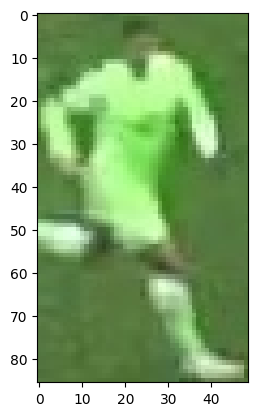

In [3]:
plt.imshow(image) # Display the image
plt.show() # Show the plot

# take the top half of the image


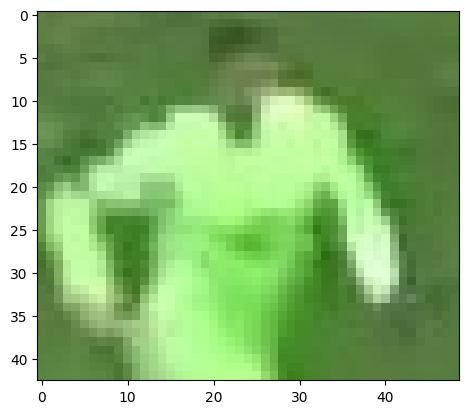

In [4]:
top_half_image = image[0 :int(image.shape[0] // 2), :]
plt.imshow(top_half_image) # Display the top half of the image
plt.show() 
 


# cluster the image into two clusters

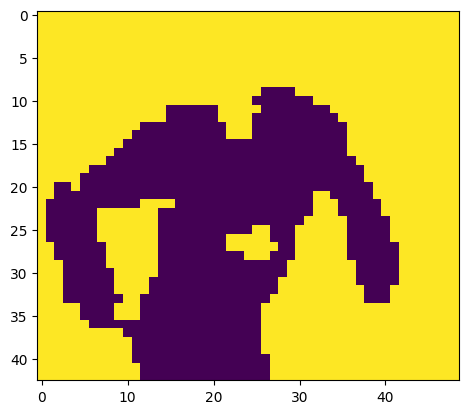

In [5]:
# Reshape the image into a 2D array
image_2d = top_half_image.reshape(-1, 3) # Reshape the image to a 2D array of pixels

#perform K-Means clustering with 2 clusters

kmeans = KMeans.KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d) # Fit the KMeans model to the image data

#get the cluster labels
labels = kmeans.labels_ 

#reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1]) 

#display the clustered image
plt.imshow(clustered_image)
plt.show()

In [6]:
corner_clusters = [
    clustered_image[0, 0],        # top-left corner
    clustered_image[0, -1],       # top-right corner
    clustered_image[-1, 0],       # bottom-left corner
    clustered_image[-1, -1]       # bottom-right corner
]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count) # Find the most common cluster in the corners
print(non_player_cluster)


1


In [7]:
player_cluster = 1- non_player_cluster 
print(player_cluster)

0


In [10]:
kmeans.cluster_centers_[player_cluster] #Green color which the player is wearing 

array([171.11330698, 235.40316206, 142.52700922])